In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing necessary libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dense

In [2]:
df = pd.read_csv('data.csv').drop(['Humidity', 'Label'], 1)
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,pH,EC
0,37,62,22,24.020379,7.397546,0.001225
1,20,72,19,32.476483,7.397191,0.001814
2,11,53,24,28.523967,7.393899,0.007267
3,108,33,31,23.692871,7.393826,0.007388
4,49,76,18,27.053652,7.393632,0.007709


In [3]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,pH,EC
count,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000
mean,51.170819,53.630402,49.970005,25.745431,6.300796,1.818102
std,37.205258,34.243773,52.562375,5.037133,0.607577,1.006512
min,0.000000,5.000000,5.000000,8.825675,3.504752,0.001225
25%,21.000000,27.000000,21.000000,22.948169,5.908328,1.084389
50%,37.000000,50.000000,34.000000,25.685767,6.345806,1.743538
75%,86.000000,69.000000,49.000000,28.559167,6.743699,2.468264
max,140.000000,145.000000,205.000000,43.675493,7.397546,6.450027


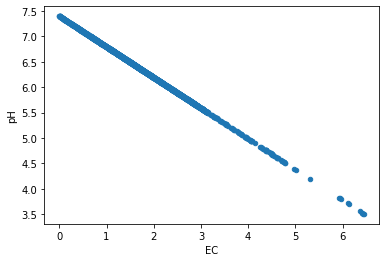

In [4]:
scatterData = df[['pH', 'EC']]
scatterData.plot.scatter(x='EC', y='pH');

In [5]:
input_data = df[['EC', 'Temperature']]
input_data.head()

,EC,Temperature
0,0.001225,24.020379
1,0.001814,32.476483
2,0.007267,28.523967
3,0.007388,23.692871
4,0.007709,27.053652


In [6]:
output_data = df.drop(['EC', 'Temperature'], 1)
output_data.head()

,Nitrogen,Phosphorus,Potassium,pH
0,37,62,22,7.397546
1,20,72,19,7.397191
2,11,53,24,7.393899
3,108,33,31,7.393826
4,49,76,18,7.393632


In [7]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.20, random_state=7)

In [ ]:
model = Sequential()
model.add(Dense(32, input_shape=(4, )))
model.add(Activation('relu'))
# model.add(Dense(16, input_shape=(16, )))
# model.add(Activation('relu'))
model.add(Dense(3, input_shape=(16, )))
model.add(Activation('relu'))

In [ ]:
# Compile the defined model
model.compile(
            optimizer='SGD',
            loss='mean_squared_error',
            metrics=['accuracy'])

In [ ]:
# Train the keras model with the train dataset
model.fit(X_train, y_train, epochs=10, batch_size=14)

In [ ]:
# Evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# Create a HDF5 file to save the model
model.save('../models/categorical_crossentropy.h5')